In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_style("whitegrid")

def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

In [2]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon, Rectangle

In [3]:
plotting_df = pd.read_csv('../data/fig1b_locations.csv')
from_df = pd.read_csv('../data/fig1b_from_steps.csv')
to_df = pd.read_csv('../data/fig1b_to_steps.csv')

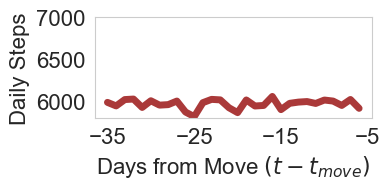

In [4]:
axis_fontsize=16

with plt.rc_context({'figure.autolayout': True}):
    fig, ax = plt.subplots(figsize=(4, 2));
    pre_x = range(-35, -5);
    y = np.random.normal(loc=from_df.loc[from_df['from_loc'] == 'Seattle, WA', 'pre_avg'], scale=50., size=(len(pre_x), ));
    plt.plot(pre_x, y, lw=5., c='#aa3939');
    plt.ylim(5800, 7000);
    ax.grid(False);
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(axis_fontsize);
    ax.set(xlabel=r'Days from Move $\left(t - t_{move}\right)$', ylabel='Daily Steps', xticks=range(-35, -4, 10));

    fig.tight_layout()

    plt.savefig('../output/fig1b_subplots/seattle_from.png',
                dpi=600);

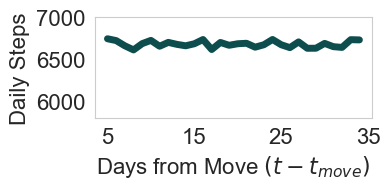

In [5]:
axis_fontsize=16

with plt.rc_context({'figure.autolayout': True}):
    fig, ax = plt.subplots(figsize=(4, 2));
    pre_x = range(5, 35);
    y = np.random.normal(loc=to_df.loc[to_df['to_loc'] == 'San Francisco, CA', 'post_avg'], scale=50., size=(len(pre_x), ));
    plt.plot(pre_x, y, lw=5., c='#0d4d4d');
    plt.ylim(5800, 7000);
    ax.grid(False);
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(axis_fontsize);
    ax.set(xlabel=r'Days from Move $\left(t - t_{move}\right)$', ylabel='Daily Steps', xticks=range(5, 36, 10));

    fig.tight_layout()

    plt.savefig('../output/fig1b_subplots/sf_to.png', dpi=600);

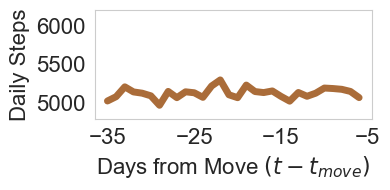

In [6]:
axis_fontsize=16

with plt.rc_context({'figure.autolayout': True}):
    fig, ax = plt.subplots(figsize=(4, 2));
    pre_x = range(-35, -5);
    y = np.random.normal(loc=from_df.loc[from_df['from_loc'] == 'Dallas, TX', 'pre_avg'], scale=50., size=(len(pre_x), ));
    plt.plot(pre_x, y, lw=5., c='#aa6c39');
    plt.ylim(4800, 6200);
    ax.grid(False);
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(axis_fontsize);
    ax.set(xlabel=r'Days from Move $\left(t - t_{move}\right)$', ylabel='Daily Steps', xticks=range(-35, -4, 10));

    fig.tight_layout()

    plt.savefig('../output/fig1b_subplots/dallas_from.png', dpi=600);

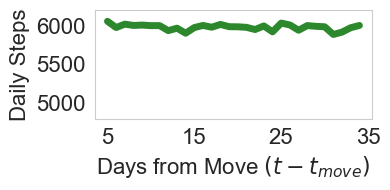

In [7]:
axis_fontsize=16

with plt.rc_context({'figure.autolayout': True}):
    fig, ax = plt.subplots(figsize=(4, 2));
    pre_x = range(5, 35);
    y = np.random.normal(loc=to_df.loc[to_df['to_loc'] == 'Chicago, IL', 'post_avg'], scale=50., size=(len(pre_x), ));
    plt.plot(pre_x, y, lw=5., c='#2d882d');
    plt.ylim(4800, 6200);
    ax.grid(False);
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(axis_fontsize);
    ax.set(xlabel=r'Days from Move $\left(t - t_{move}\right)$', ylabel='Daily Steps', xticks=range(5, 36, 10));

    fig.tight_layout()

    plt.savefig('../output/fig1b_subplots/chicago_to.png', dpi=600);

In [8]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

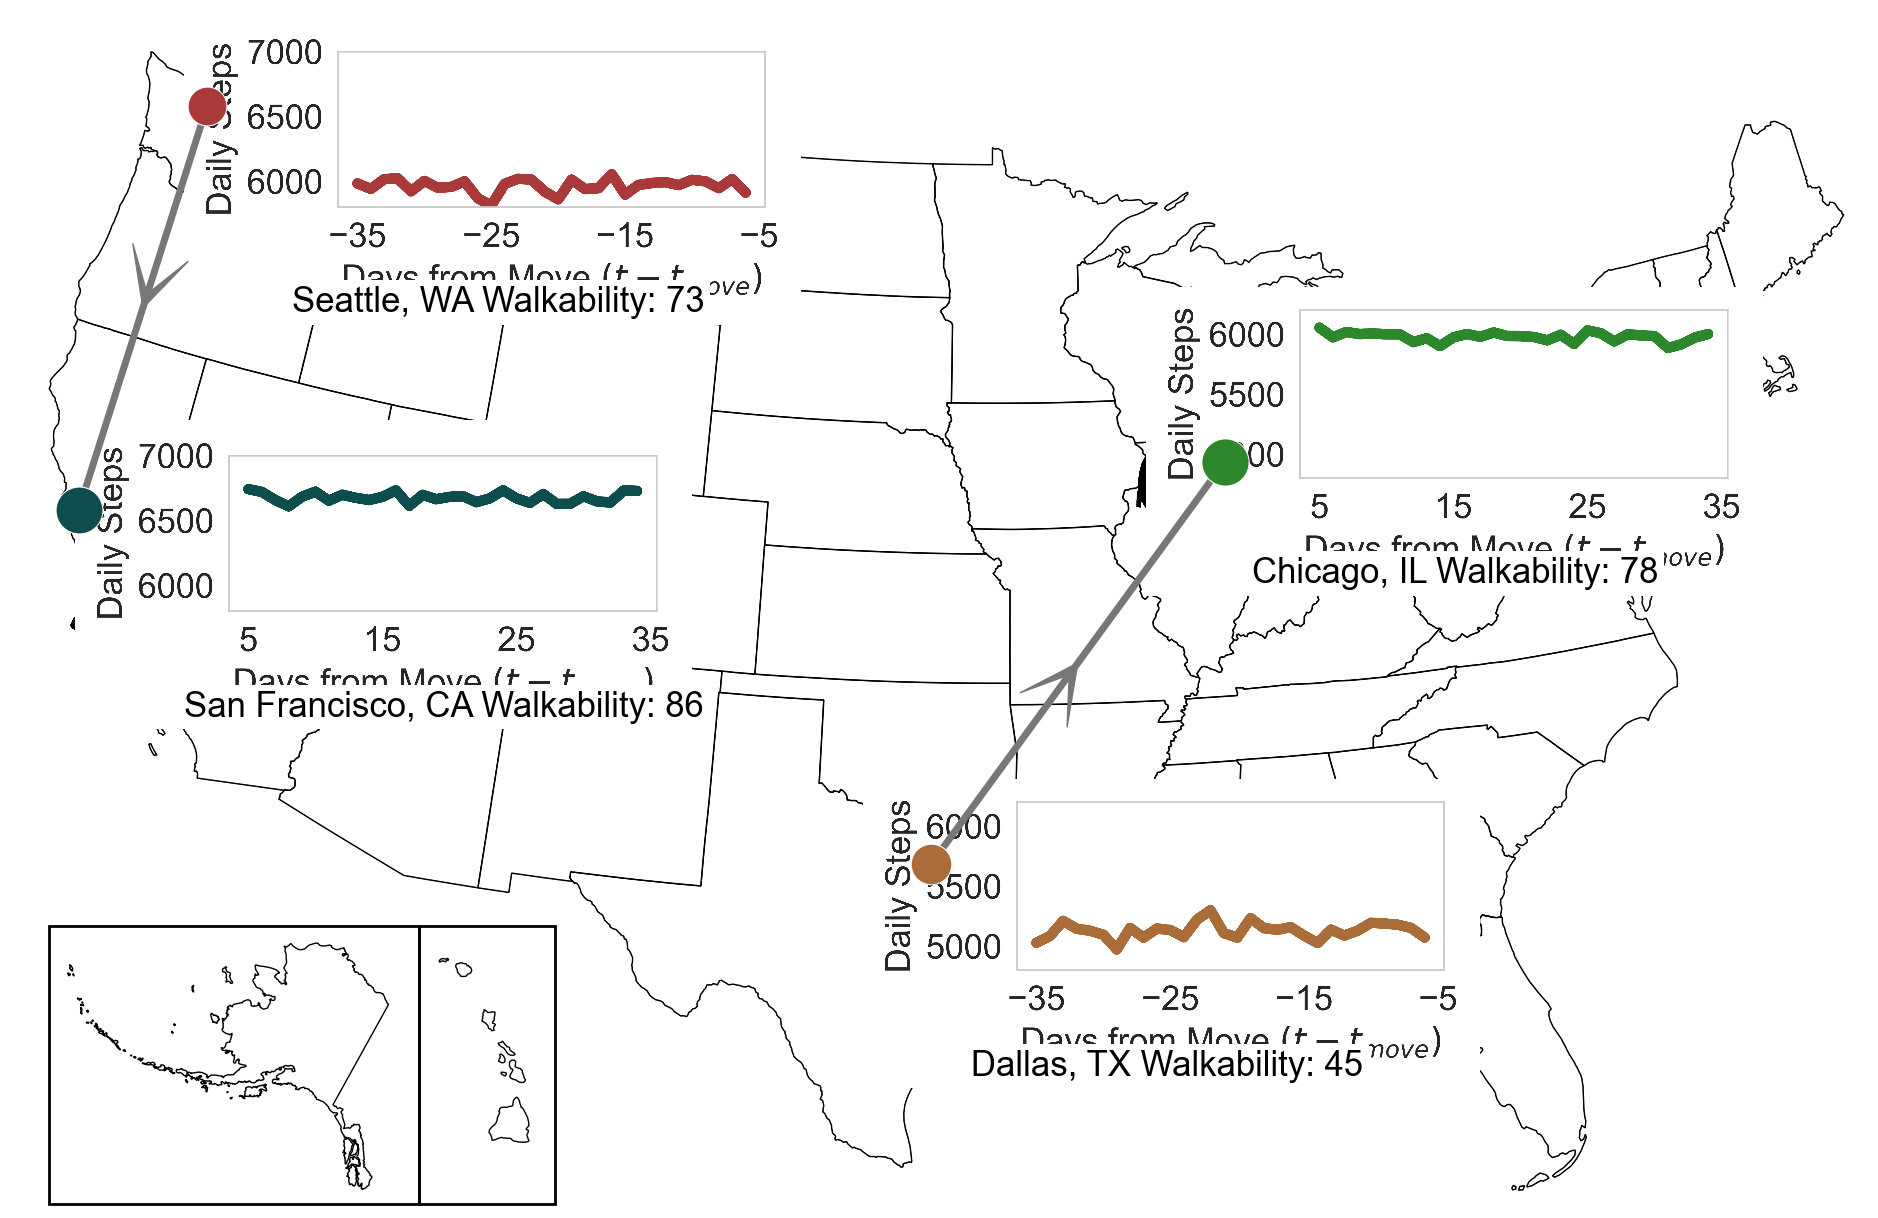

In [10]:
axis_fontsize=12
category_fontsize=12

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

fig = plt.figure();
ax = fig.add_subplot(111, facecolor='w', frame_on=False);
fig.set_size_inches(26.5, 15.5);

coast_color = 'k'
state_bound_color = 'k'
state_face_color = 'white'

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('../data/us_shapefile/cb_2016_us_state_20m', 'states', drawbounds=True, color=coast_color)

statenames=[]
for shapedict in m.states_info:
    statename = shapedict['NAME']
    statenames.append(statename)

def alaska_correct(tup):
    (x, y) = tup
    return (0.25*x + 850000, 0.25*y - 900000)

def hawaii_correct(tup):
    (x, y) = tup
    return (0.8*x + 4200000, 0.8*y - 1000000)
    
# cycle through state names, color each one.
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
    # Offset Alaska and Hawaii to the lower-left corner. 
        if statenames[nshape] == 'Alaska':
            # Alaska is too big. Scale it down first, then transate it. 
            seg = list(map(alaska_correct, seg))
        if statenames[nshape] == 'Hawaii':
            seg = list(map(hawaii_correct, seg))

        poly = Polygon(seg, facecolor=state_face_color, edgecolor=state_bound_color)
        ax.add_patch(poly)
        
ax.axis('off')

map_points_lat = plotting_df['lat']
map_points_lon = plotting_df['lon']
values = plotting_df['num_users']

# Create Point objects in map coordinates from dataframe lon and lat values
map_points = pd.Series(
                [Point(m(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(map_points_lon,
                                               map_points_lat)]);

point_sizes = lambda x: np.sqrt(x*5000)

edge_widths = 0.75
line_widths = 5.
point_colors = ['#aa3939', '#aa6c39', '#0d4d4d', '#2d882d']

man_img = plt.imread('../data/panel_1b/man-silhouette.png', format='png');
woman_img = plt.imread('../data/panel_1b/woman-silhouette.png', format='png');
man_walking_img = plt.imread('../data/panel_1b/man_walking.png', format='png');
woman_walking_img = plt.imread('../data/panel_1b/woman_walking.png', format='png');

seattle_fig = plt.imread('../output/fig1b_subplots/seattle_from.png', format='png');
sf_fig = plt.imread('../output/fig1b_subplots/sf_to.png', format='png');
dallas_fig = plt.imread('../output/fig1b_subplots/dallas_from.png', format='png');
chicago_fig = plt.imread('../output/fig1b_subplots/chicago_to.png', format='png');

subcaptions = ['Seattle, WA Walkability: 73', 
               'Dallas, TX Walkability: 45', 
               'San Francisco, CA Walkability: 86',
               'Chicago, IL Walkability: 78']

figs = [seattle_fig, dallas_fig] + [sf_fig, chicago_fig]

# FROM1 FROM2 TO1 TO2
xytexts = [(85., -180.), (40., -185.), (105., -180.), (27., -95.)]

img_boxs = [(285., -65.), (240., -70.), (305., -65.), (230., 20.)]

people_boxes = [(40., -40.), (-40., -40.), (40., -40.), (-50., 40.)]

arrow_z = 10
for idx, geom in enumerate(map_points):
    dev = m.scatter(
                [geom.x],
                [geom.y],
                s=point_sizes(values.iloc[idx]),
                c=point_colors[idx],
                marker='o', lw=edge_widths,
                edgecolor='w',
                alpha=1.0, antialiased=True,
                zorder=arrow_z+1);
    
    imagebox = OffsetImage([man_img, woman_img, man_walking_img, woman_walking_img][idx], zoom=0.1)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, (geom.x, geom.y),
                        xybox=people_boxes[idx],
                        xycoords='data',
                        boxcoords="offset pixels",
                        bboxprops={'ec': 'None', 'fc': 'None'},
                        pad=0.5)
    ax.add_artist(ab)
    
    imagebox = OffsetImage(figs[idx], zoom=0.185)
    imagebox.image.axes = ax
    ab = AnnotationBbox(imagebox, (geom.x, geom.y),
                        xybox=img_boxs[idx],
                        xycoords='data',
                        boxcoords="offset pixels",
                        bboxprops={'fc': 'white'},
                        frameon=False,
                        pad=0.5)
    ax.add_artist(ab)
    
    ax.annotate(subcaptions[idx],
                xy=(geom.x, geom.y), xycoords='data',
                xytext=xytexts[idx], textcoords='offset pixels',
                va='top',
                size=axis_fontsize+13, color='k',
                bbox={'ec': 'None', 'fc': 'white'})

to_plot_x = list()
to_plot_y = list()
arrow_head_dim = 150000.
arrow_color = '#777777'

ax.arrow(map_points[0].x, 
         map_points[0].y, 
         (map_points[2].x - map_points[0].x)/2.,# - (arrow_head_dim)*np.cos(arrow_dir), 
         (map_points[2].y - map_points[0].y)/2.,# - (arrow_head_dim)*np.sin(arrow_dir),
         length_includes_head=True,
         head_width=arrow_head_dim,
         head_length=arrow_head_dim,
         fc=arrow_color, ec=arrow_color, overhang=0.75,
         zorder=arrow_z)

to_plot_x.extend([map_points[0].x, map_points[2].x, None])
to_plot_y.extend([map_points[0].y, map_points[2].y, None])

ax.arrow(map_points[1].x, 
         map_points[1].y, 
         (map_points[3].x - map_points[1].x)/2.,# - (arrow_head_dim)*np.cos(arrow_dir), 
         (map_points[3].y - map_points[1].y)/2.,# - (arrow_head_dim)*np.sin(arrow_dir),
         length_includes_head=True,
         head_width=arrow_head_dim,
         head_length=arrow_head_dim,
         fc=arrow_color, ec=arrow_color, overhang=0.75,
         zorder=arrow_z)

to_plot_x.extend([map_points[1].x, map_points[3].x, None])
to_plot_y.extend([map_points[1].y, map_points[3].y, None])

ax.plot(to_plot_x,
        to_plot_y,
        lw=line_widths,
        c=arrow_color,
        zorder=arrow_z);
    
inset_color = 'k'
inset_width = 2
ax.add_patch(Rectangle((100000, 10000),950000,715000,linewidth=inset_width,edgecolor=inset_color,facecolor='none', zorder=10));
ax.add_patch(Rectangle((1050000, 10000),350000,715000,linewidth=inset_width,edgecolor=inset_color,facecolor='none', zorder=10));

plt.savefig('../output/fig1b.pdf', dpi=300);